<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


### Let's try to create some synthetic data here


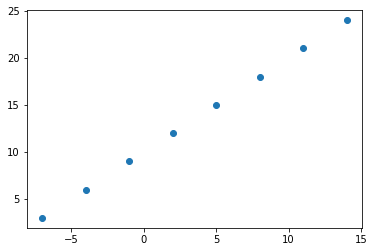

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# creating features
x = np.array([-7.0,-4.0,-1.0,2,5,8,11,14])

# creating labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(x,y)

In [3]:
## converting the arrays into tensors
x_tensor = tf.constant(x)
y_tensor = tf.constant(y)
x_tensor,y_tensor

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Steps in modeling with tensorflow
1. Creating a model- define the input, output and hidden layers.
2. Compiling a model- Define the loss function which tells our model how wrong it is. Optimizer tells your model how to improve the pattern it is leaning and evaluation metrics.
3. Fitting a model: training the model. 

In [4]:
## set random seed
tf.random.set_seed(42)

## 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)   ## as we will only pass 1
])

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## 3. Fitting the model
model.fit(tf.expand_dims(x,axis=1),y, epochs= 5)  ## expanding the dimensions of input so that it can be converted into batches

Epoch 1/5
1/1 [==============================] - 1s 566ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


## Above we used loss and metrics to be same and that's why we can see loss: and mae: values to be same for every epoch. Let's try to predict and check .

In [5]:
tf.expand_dims(x,axis=1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [6]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Another way of creating models


In [7]:
## set random seed
tf.random.set_seed(42)

## 1. create a model using sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

## 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## 3. Fitting the model
model.fit(tf.expand_dims(x,axis=1),y, epochs= 5)  ## expanding the dimensions of input so that it can be converted into batches

Epoch 1/5
1/1 [==============================] - 0s 291ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9748 - mae: 10.9748


## As we observed up that prediction is not that good, Let's see now how can we increase the prediction accuracy

### Steps we can do to improve our model
1. **while creating a model** - We may add more layers, increase the neurons in hidden layers, change the activation function
2. **Compiling the model** - Here we can change the optimization function or the **learning rate** of it.
3. **Fitting a model** - Here we can fit a model for more epochs, or more data examples to learn

In [8]:
## creating another version of the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## fitting the model on 100 epochs

model.fit(tf.expand_dims(x, axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 272ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8m

In [9]:
model.predict([17.0]) ## we can see that the output is somewhat closer than what we expect

array([[29.739855]], dtype=float32)

In [10]:
## Let's create another set of model with different configurations
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(x, axis=1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 548ms/step - loss: 14.6059 - mae: 14.6059
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 14.3084 - mae: 14.3084
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0240 - mae: 14.0240
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7479 - mae: 13.7479
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4755 - mae: 13.4755
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2026 - mae: 13.2026
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9247 - mae: 12.9247
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6375 - mae: 12.6375
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3363 - mae: 12.3363
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0160 - mae: 12.0160
Epoch 11/100
1/1 [==============================] - 0

In [11]:
model.predict([17.0])

array([[21.965601]], dtype=float32)

In [12]:
## trying the same configuration with different optimizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 776ms/step - loss: 19.5326 - mae: 19.5326
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 19.5274 - mae: 19.5274
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 19.5222 - mae: 19.5222
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 19.5169 - mae: 19.5169
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 19.5117 - mae: 19.5117
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 19.5064 - mae: 19.5064
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 19.5012 - mae: 19.5012
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 19.4960 - mae: 19.4960
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 19.4908 - mae: 19.4908
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 19.4855 - mae: 19.4855
Epoch 11/100
1/1 [==============================] 

In [13]:
model.predict([17.0])

array([[-20.367725]], dtype=float32)

## Looks like ADAM optimizer is not working for us but let's try with other learning rate

In [14]:
## trying the same configuration with different optimizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae']
              )

model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 732ms/step - loss: 12.7997 - mae: 12.7997
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5182 - mae: 12.5182
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2424 - mae: 12.2424
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9697 - mae: 11.9697
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6988 - mae: 11.6988
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4275 - mae: 11.4275
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1529 - mae: 11.1529
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8723 - mae: 10.8723
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5838 - mae: 10.5838
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2859 - mae: 10.2859
Epoch 11/100
1/1 [==============================] 

In [15]:
model.predict([17.0])

array([[26.73691]], dtype=float32)

### In practice we always follow this workflow:
```
Build a model -> fill it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweat a model -> fit it -> evaluate it...
```

### When it comes to evaluation we should always remember:
> "visualize, visualize, visualize"

It's a good idea to visulize:
* The data - what data we are working with? what does it look like?
* The model itself - What does our model look like ?
* The training of a model - how does model perform while it learns?
* The predictions of the model - How do predicitons of a model look like when lined up against the ground truth

In [16]:
## Let's make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
## making labels for our dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

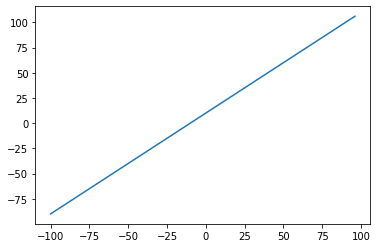

In [18]:
## Let's visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y)

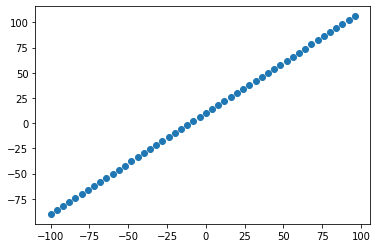

In [19]:
plt.scatter(X,y)

### The 3 sets
* **Training set** The training set is the data on which the model is trained, it is typically 70% to 80% of the full dataset.
* **Validation set** The validation set is the data by validation on whose we tweak the model. It is 10% to 15% of the total dataset.
* **Test set** The test set is the final test through which model is evaluated. It is also 10% to 15% of the total dataset.


In [20]:
## Here we will only split into train and test splits because of smaller set
x_train = X[:40]  ## first 40 for training around 80%
y_train = y[:40]
x_test = X[40:] ## last 10 for testing around 20%
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

[]

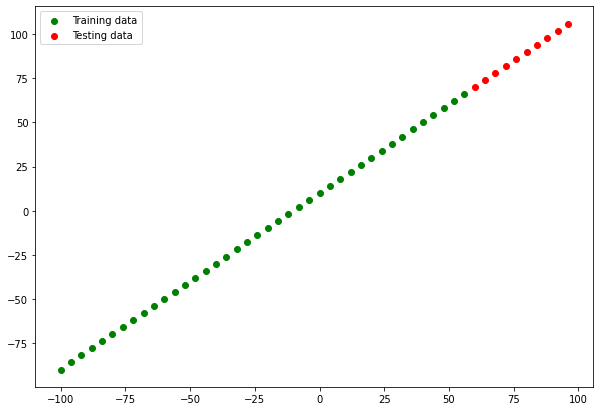

In [25]:
## Let's visualize our training and testing set
plt.figure(figsize=(10,7))
## training data in green
plt.scatter(x_train,y_train, c="g", label="Training data")
## testing data in red
plt.scatter(x_test,y_test, c="R", label="Testing data")
plt.legend()
plt.plot()

In [26]:
## Creating a basic model and visualizing it

## creating 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

## let's not fit it right now

In [29]:
try:
  model.summary()
except Exception as e:
  print(e)

This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


### Now the above error came because the model has not defined with any input shape, so tf can automatically define the input shape when we run the model for training. But in order to check the model architecture or summary we need to either build the model first with training data or include input shape argument while creating the model.

In [87]:
## creating another model from scratch with input shape
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(tf.expand_dims(x_train), y_train, epochs = 100)

In [88]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


As we know once neuron has one weight and one bias hence overall two trainable parameters.

* **Total params** = Total number of paramters in the model
* **Trainable parameters** = These are the paramters model will update when it trains.
* **Non-trainable parameters** = These paramters aren't updated during training these are used when we use transfer learning and don't retrain the pretrained layers.

In [34]:
model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 21.5127 - mae: 21.5127
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8784 - mae: 9.8784
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3224 - mae: 11.3224
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5330 - mae: 9.5330
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4384 - mae: 10.4384
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6676 - mae: 9.6676
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7680 - mae: 8.7680
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0557 - mae: 9.0557
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.2566 - mae: 19.2566
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3912 - mae: 10.3912
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - los

In [79]:
## creating different model and checking its paramter but not executing
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

## compiling
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [80]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 100)               200       
                                                                 
 dense_56 (Dense)            (None, 50)                5050      
                                                                 
 dense_57 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


### Simple explaination of the parameters--
> layer 1 =  100 neurons = 100 weights + 100 biases = 200 params
> layers 2 = 50 neurons = each neuron from layer 1 multiplying to each neuron of layer 2. Hence, 100 * 50 = 5000 weights of layer 2 + 50 bias of each 50 neurons on layer 2.
> layer 3 =  1 neuron = each neuron from layer 2 multiplying to each neuron of layer 3. Hence, 50 * 1= 50 weights of layer 3 and 1 bias of 1 neuron on layer 3.

In [82]:
model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 33.9098 - mae: 33.9098
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 19.2417 - mae: 19.2417
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4141 - mae: 27.4141
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 20.4886 - mae: 20.4886
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 17.2452 - mae: 17.2452
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 17.7249 - mae: 17.7249
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 23.1197 - mae: 23.1197
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 24.3025 - mae: 24.3025
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6351 - mae: 8.6351
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 32.3971 - mae: 32.3971
Epoch 11/100
2/2 [==============================] - 0s 4ms/st

In [64]:
## Let's create one more model and more neurons and some complex structure and check
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [65]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                100       
                                                                 
 dense_51 (Dense)            (None, 30)                1530      
                                                                 
 dense_52 (Dense)            (None, 15)                465       
                                                                 
 dense_53 (Dense)            (None, 8)                 128       
                                                                 
 dense_54 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,232
Trainable params: 2,232
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(tf.expand_dims(x_train,axis=1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 61.2952 - mae: 61.2952
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 26.4702 - mae: 26.4702
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 10.4860 - mae: 10.4860
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9684 - mae: 12.9684
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0133 - mae: 12.0133
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2972 - mae: 9.2972
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4612 - mae: 8.4612
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0497 - mae: 9.0497
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.4496 - mae: 18.4496
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9572 - mae: 9.9572
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

In [59]:

## creating a more custom model with custom names of model and layers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="First_hidden_layer"),
    tf.keras.layers.Dense(25, name="Second_hidden_layer"),
    tf.keras.layers.Dense(5,name="Third_hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="My_Custom_model")

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [60]:
model.summary()

Model: "My_Custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_hidden_layer (Dense)  (None, 50)                100       
                                                                 
 Second_hidden_layer (Dense)  (None, 25)               1275      
                                                                 
 Third_hidden_layer (Dense)  (None, 5)                 130       
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 1,511
Trainable params: 1,511
Non-trainable params: 0
_________________________________________________________________


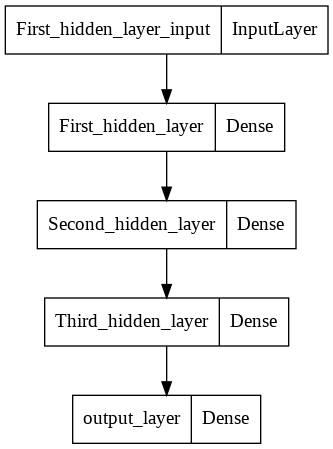

In [61]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

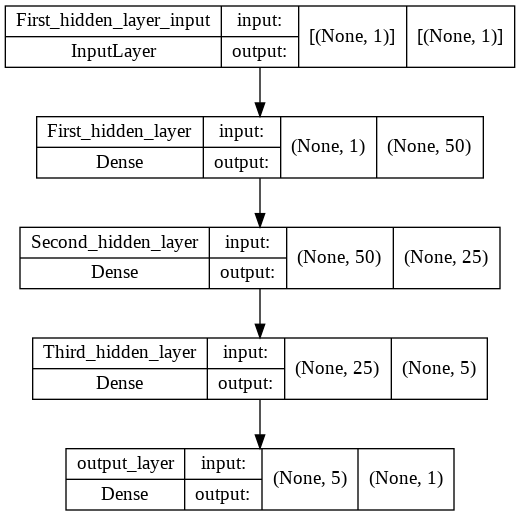

In [63]:
plot_model(model=model, show_shapes=True)

## Let's give it a try to visualize our predictions, so let's predict on x_test and compare it with y_testm with a beautifull visualization

In [90]:
## prediting first
y_pred = model.predict(x_test)
y_pred

array([[44.387936],
       [47.261463],
       [50.13499 ],
       [53.008522],
       [55.88205 ],
       [58.75558 ],
       [61.62911 ],
       [64.50263 ],
       [67.37616 ],
       [70.24969 ]], dtype=float32)

In [91]:
## Let's convert the y_pred into the tensors
y_pred = tf.constant(y_pred)
y_pred,y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[44.387936],
        [47.261463],
        [50.13499 ],
        [53.008522],
        [55.88205 ],
        [58.75558 ],
        [61.62911 ],
        [64.50263 ],
        [67.37616 ],
        [70.24969 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [94]:
## Let's create a function to plot 

def plot_evaluation(train_data = x_train, train_label=y_train, test_data=x_test, test_label=y_test, prediction = y_pred):
  plt.figure(figsize=(10,7))
  ## plotting the train set
  plt.scatter(train_data, train_label, c="g")
  ## plotting the test set
  plt.scatter(test_data,test_label, c="b")
  ## plotting the predictions w.r.t to test labels
  plt.scatter(prediction,test_label, c="r")
  plt.legend()
  plt.plot()

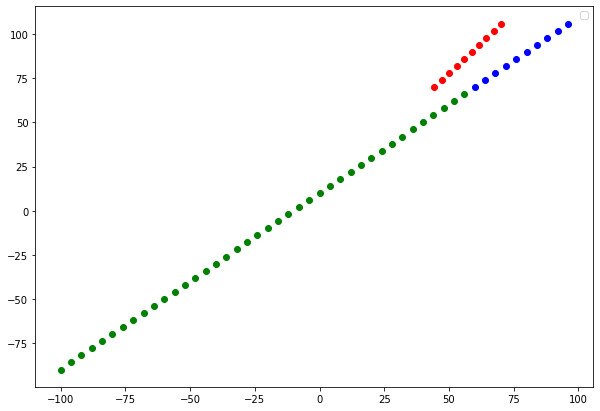

In [95]:
plot_evaluation()

In [107]:
## Let's evaluate the model
model.evaluate(x_test,y_test)   ## It will show mae because we chose mae as loss and mae as metrics while creating model

1/1 [==============================] - 0s 167ms/step - loss: 30.6812 - mae: 30.6812


[30.68118667602539, 30.68118667602539]

In [100]:
## calculating the mean absoulte error 
mae = tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.612064, 40.738537, 37.86501 , 34.991478, 32.11795 , 29.24442 ,
       26.370892, 23.497368, 20.62384 , 17.800251], dtype=float32)>

### Our mae is not as same as model.evaluate() output that is because the y_pred has different shape than the y_test. So let's decrese the dimension of the y_pred

In [102]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44.387936, 47.261463, 50.13499 , 53.008522, 55.88205 , 58.75558 ,
       61.62911 , 64.50263 , 67.37616 , 70.24969 ], dtype=float32)>

In [108]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.681187>

## Now the mae is same as the model.evaluate()

In [109]:
## Let's calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=951.8039>

In [110]:
## Make some functions for mae and mse
def mae(true,pred):
  return tf.metrics.mean_absolute_error(true,pred)

def mse(true,pred):
  return tf.metrics.mean_squared_error(true,pred)
  